In [1]:
# %load ../scripts/imports.py
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_context("talk", font_scale=1.5, rc={"figure.figsize": (20,10)})
sns.set_style("whitegrid")

In [2]:
c_zips =[98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 
          98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 
          98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 
          98154, 98164, 98174, 98177, 98178, 98195, 98199]

In [3]:
df = pd.read_csv('../data/King_County_House_prices_dataset.csv')
    
#cleaning basement values
df.sqft_basement = df.sqft_basement.replace('?', '-1.0')
df.sqft_basement = df.sqft_basement.astype(float) 
#fixing date dt
df["date"] = pd.to_datetime(df["date"])
df.price = df.price.astype(int)

In [4]:
df = df[df.zipcode.isin(c_zips)]

In [5]:
df_iq = df.price
q1 = df.price.quantile(0.55)
q3 = df.price.quantile(0.75)
iqr = q3-q1
df = df[~(df.price < (q1 - 1.5 * iqr)) |
          (df.price > (q3 + 1.5 * iqr))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             6543 non-null   int64         
 1   date           6543 non-null   datetime64[ns]
 2   price          6543 non-null   int64         
 3   bedrooms       6543 non-null   int64         
 4   bathrooms      6543 non-null   float64       
 5   sqft_living    6543 non-null   int64         
 6   sqft_lot       6543 non-null   int64         
 7   floors         6543 non-null   float64       
 8   waterfront     5836 non-null   float64       
 9   view           6524 non-null   float64       
 10  condition      6543 non-null   int64         
 11  grade          6543 non-null   int64         
 12  sqft_above     6543 non-null   int64         
 13  sqft_basement  6543 non-null   float64       
 14  yr_built       6543 non-null   int64         
 15  yr_renovated   5343 

<AxesSubplot:xlabel='price', ylabel='Count'>

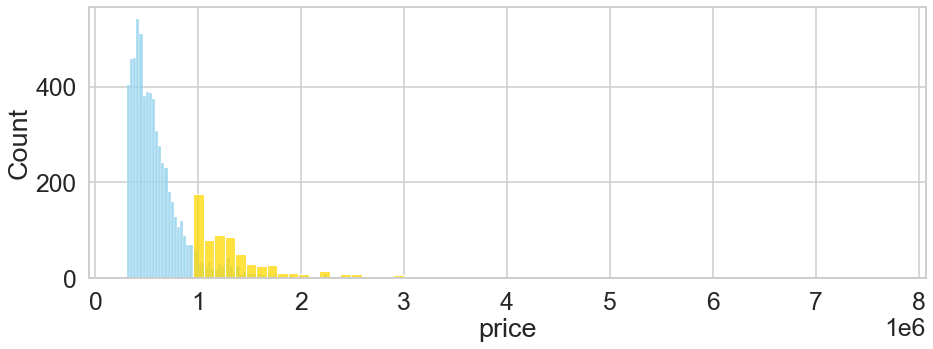

In [6]:
top = df[~(df.price < df.price.quantile(0.9))]
plt.figure(figsize=(15, 5))
sns.histplot(df.price, color='skyblue')
sns.histplot(top.price, color='gold')

In [7]:
top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 91 to 21590
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             667 non-null    int64         
 1   date           667 non-null    datetime64[ns]
 2   price          667 non-null    int64         
 3   bedrooms       667 non-null    int64         
 4   bathrooms      667 non-null    float64       
 5   sqft_living    667 non-null    int64         
 6   sqft_lot       667 non-null    int64         
 7   floors         667 non-null    float64       
 8   waterfront     607 non-null    float64       
 9   view           663 non-null    float64       
 10  condition      667 non-null    int64         
 11  grade          667 non-null    int64         
 12  sqft_above     667 non-null    int64         
 13  sqft_basement  667 non-null    float64       
 14  yr_built       667 non-null    int64         
 15  yr_renovated   545 n

In [8]:
explanatory_vars = ['sqft_living', 'sqft_lot',
                    'floors', 'sqft_above', 'yr_built', 'yr_renovated',
                    'sqft_basement', 'lat', 'long','sqft_living15', 'sqft_lot15']
categoricals = ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'zipcode',]

In [9]:
#see what correlates with price
c = df.corr()['price'][2:]
c.sort_values(ascending=False)
explanatory_vars = [ e for e in c[c.values > 0.5].index if e in explanatory_vars]
categoricals = [ ca for ca in c[c.values > 0.5].index if ca in categoricals]
all_exp = explanatory_vars+categoricals
print(explanatory_vars+categoricals)

['sqft_living', 'sqft_above', 'sqft_living15', 'grade']


<AxesSubplot:>

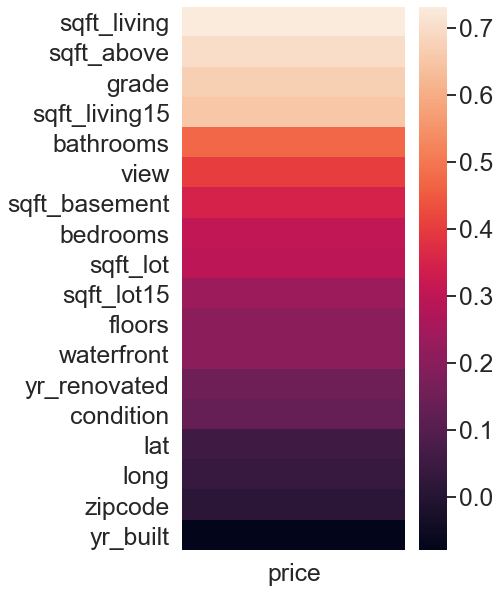

In [10]:
plt.figure(figsize=(5, 10))
sns.heatmap(df.corr()[['price']][2:].sort_values(by='price', ascending=False))

R squared for each possible explanatory variable:


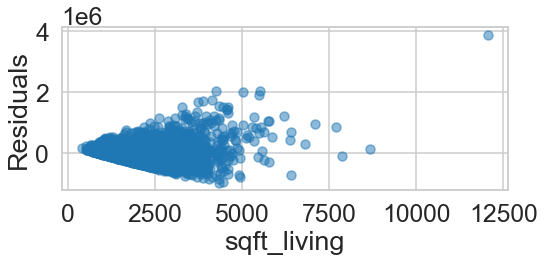

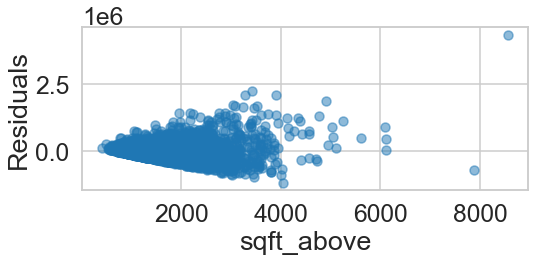

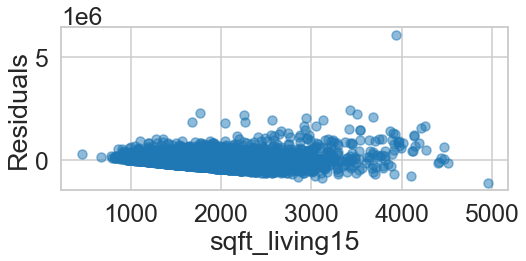

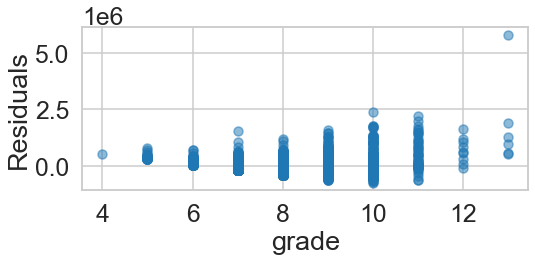

In [11]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in all_exp:
    X = df[explanatory_var]
    X = sm.add_constant(X)
    model = sm.OLS(df.price, X)
    result = model.fit()
    pre = result.predict()
    rs = result.resid
    #print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.scatter(df[explanatory_var], rs, alpha=0.5)
    ax.set_ylabel("Residuals")
    ax.set_xlabel(explanatory_var)

In [12]:
#removing outliers
outl = all_exp
df_iq = df[outl]
q1 = df[outl].quantile(0.25)
q3 = df[outl].quantile(0.75)
iqr = q3-q1
df = df[~((df[outl] < (q1 - 1.5 * iqr)) |
          (df[outl] > (q3 + 1.5 * iqr))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5918 non-null   int64         
 1   date           5918 non-null   datetime64[ns]
 2   price          5918 non-null   int64         
 3   bedrooms       5918 non-null   int64         
 4   bathrooms      5918 non-null   float64       
 5   sqft_living    5918 non-null   int64         
 6   sqft_lot       5918 non-null   int64         
 7   floors         5918 non-null   float64       
 8   waterfront     5273 non-null   float64       
 9   view           5903 non-null   float64       
 10  condition      5918 non-null   int64         
 11  grade          5918 non-null   int64         
 12  sqft_above     5918 non-null   int64         
 13  sqft_basement  5918 non-null   float64       
 14  yr_built       5918 non-null   int64         
 15  yr_renovated   4822 

In [13]:
explanatory_vars = ['sqft_living', 'sqft_lot',
                    'floors', 'sqft_above', 'yr_built', 'yr_renovated',
                    'sqft_basement', 'lat', 'long','sqft_living15', 'sqft_lot15']
categoricals = ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'zipcode',]

In [14]:
#see what changes after outliers removed -> bathroom gone
c = df.corr()['price'][2:]
c.sort_values(ascending=False)
explanatory_vars = [ e for e in c[c.values > 0.4].index if e in explanatory_vars]
categoricals = [ ca for ca in c[c.values > 0.4].index if ca in categoricals]
all_exp = explanatory_vars+categoricals
print(explanatory_vars+categoricals)

['sqft_living', 'sqft_above', 'sqft_living15', 'grade']


<AxesSubplot:>

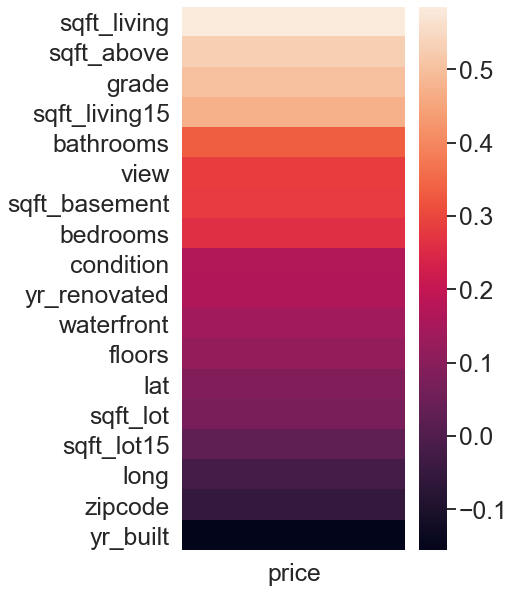

In [15]:
plt.figure(figsize=(5, 10))
sns.heatmap(df.corr()[['price']][2:].sort_values(by='price', ascending=False))

R squared for each possible explanatory variable:


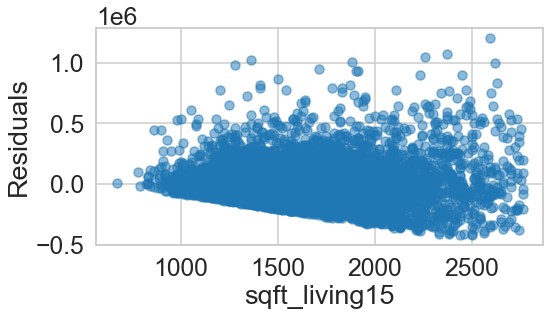

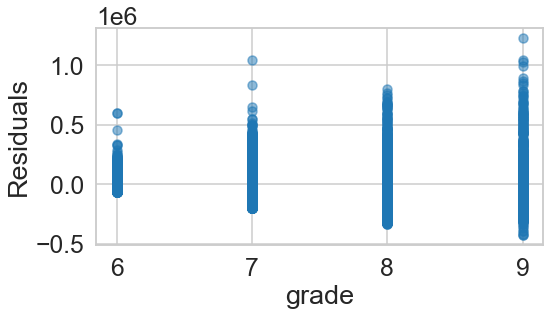

In [16]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in all_exp:
    X = df[explanatory_var]
    X = sm.add_constant(X)
    model = sm.OLS(df.price, X)
    result = model.fit()
    pre = result.predict()
    rs = result.resid
    #print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(df[explanatory_var], rs, alpha=0.5)
    ax.set_ylabel("Residuals")
    ax.set_xlabel(explanatory_var)

Text(0.5, 0, 'All explanatories')

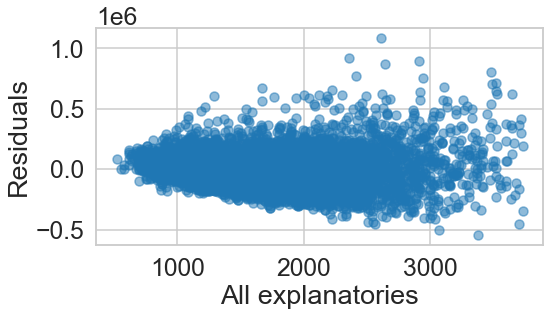

In [17]:
# so what to do with this: when Amy decides what price she could expect for her asset.
# we can now use her asset data and tell her. we only need sqft data example
X = df[all_exp]
X = sm.add_constant(X)
model = sm.OLS(df.price, X)
result = model.fit()
pre = result.predict()
rs = result.resid
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df.sqft_living, rs, alpha=0.5)
ax.set_ylabel("Residuals")
ax.set_xlabel('All explanatories')

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1199.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:13:50   Log-Likelihood:                -78873.
No. Observations:                5918   AIC:                         1.578e+05
Df Residuals:                    5913   BIC:                         1.578e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.474e+05   1.99e+04    -17.484      0.000   -3.86e+05   -3.08e+05
sqft_living      97.3232      5.110     19.046      0.000      87.306     107.340
sqft_above       53.2652      6.880      7.742      0.000      39.778      66.752
sqft_living15   110.6056      6.103     18.122      0.000      98.641     122.571
grade          6.451e+04   3031.202     21.283      0.000    5.86e+04    7.05e+04
==============================================================================
Omnibus:                      878.284   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2564.068
Skew:                           0.786   Prob(JB):                         0.00
Kurtosis:                       5.816   Cond. No.                     2.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#predict price
e_house = df[all_exp][df.id == df.id.values[1]].values
e_house = e_house.flatten()
e_house
p = result.predict([1.0, 2730, 2130, 2730, 8])
print('Price for the example house will probably be around {:}'.format(p[0]))

Price for the example house will probably be around 849790.9603184385


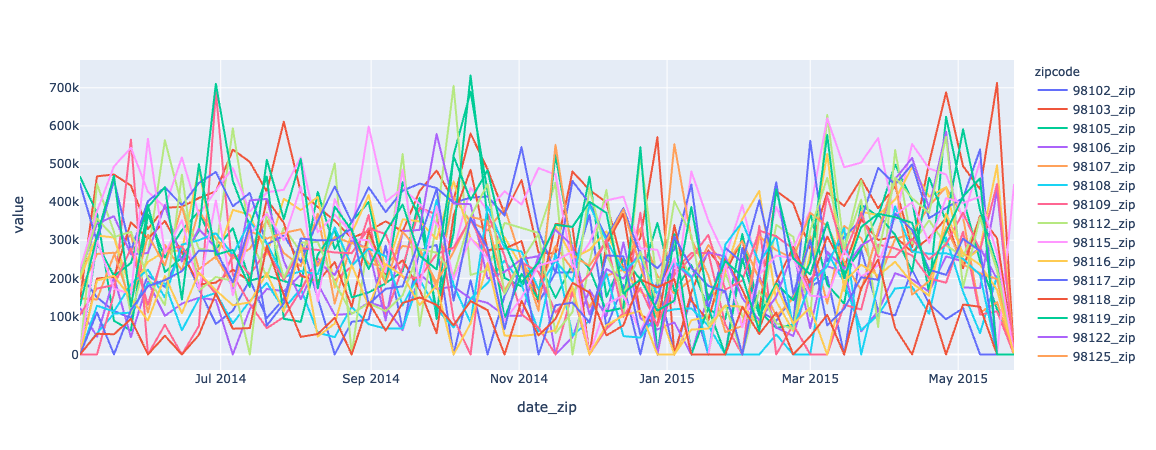

In [20]:
#show price over time
osk_zip_pivot = pd.pivot_table(df[['zipcode', 'date', 'price']], values='price', index=['date'], columns=['zipcode']).reset_index()
osk_zip_pivot.fillna(0, inplace=True)
osk_zip_pivot = osk_zip_pivot.resample('W', on='date').mean().reset_index()
osk_zip_pivot = osk_zip_pivot.add_suffix('_zip')
px.line(osk_zip_pivot, x='date_zip', y=osk_zip_pivot.columns)